In [1]:
from ephys_queries import select_spike_times
from ephys_queries import db_setup_core
from spiketimes.df import (
    cross_corr_df_test,
)
import dotenv
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
from spiketimes.df import population_coupling_df_by

In [3]:
data_dir = Path(".").absolute().parent / "data"
df_labels = pd.read_csv(data_dir / "chronic_baseline.csv")
df_labels = df_labels[["neuron_id", "type", "session_name", "mean_firing_rate"]]

In [4]:
dotenv.load_dotenv()
engine, metadata = db_setup_core()
group_names = [
    "citalopram_continuation",
    "chronic_saline",
    "citalopram_discontinuation",
    "chronic_citalopram",
    "chronic_saline_",
]
block_name = "pre"
df_spikes = select_spike_times(engine, metadata, block_name=block_name)
df_spikes["spiketimes"] = df_spikes["spike_time_samples"].divide(30000)

In [5]:
# merge datasets
df = pd.merge(df_spikes, df_labels, on="neuron_id")

In [6]:
df = df[df["type"] != "no_baseline"]

In [7]:
df_out = population_coupling_df_by(df, spiketimes_col="spiketimes", 
                                   neuron_col="neuron_id", 
                                   by_col="session_name",
                                   bin_window=0.001,
                                  num_lags=400)

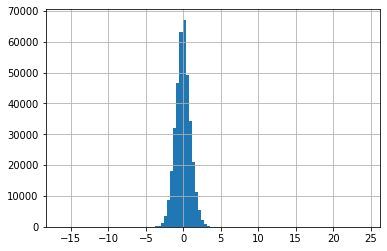

In [9]:
df_out["zscore"].hist(bins=100)

In [11]:
df_out.to_csv(data_dir / "population_coupling.csv", index=False)